# Recommendations to Improve MLB Attendance
## Author: Ahria Dominguez
### Last Updated: 6/29/2024

In this project, we use Major League Baseball (MLB) data for the Dodgers team to give a recommendation on how to improve fan attendance to Dodgers games.

The data includes:
- month: The month of the game
- day: The day of the month of the game
- attend: The number of people who attended the game
- day_of_week: The day of the week of the game
- opponent: The team the Dodgers played against
- temp: The temperature outside
- skies: The weather condition of the skies
- day_night: Whether the game happened during the day or at night
- cap: If a baseball cap was given to fans
- shirt: If a shirt was given to fans
- fireworks: It fireworks occurred
- bobblehead: If a bobblehead was given to fans

#### Load in the Data

In [1]:
# Imports the pandas library in order to load in and work with the data.
import pandas as pd

In [2]:
# Loads in the data to the variable 'dodgers'.
dodgers = pd.read_csv("dodgers-2022.csv")

In [3]:
# Prints the header of the data frame to show the import worked.
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


#### Exploratory Visualizations

Before jumping into code, I want to create simple visualizations to get an idea of what the dataset looks like and any relationships that may jump out at me.

In [4]:
# Imports the matplotlib library to create exploratory visualizations.
import matplotlib.pyplot as plt

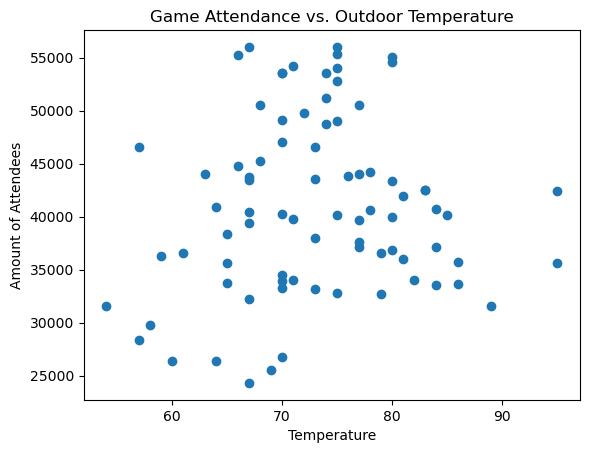

In [5]:
# Creates a scatter plot to visualize the relationship between attendance and temperature.
plt.scatter(dodgers.temp, dodgers.attend)
plt.title("Game Attendance vs. Outdoor Temperature")
plt.xlabel("Temperature")
plt.ylabel("Amount of Attendees")
plt.show()

It doesn't appear just by looking at the scatter plot of attendance vs. temperature that there is any correlation. The data points are all over the chart and in no particular line.

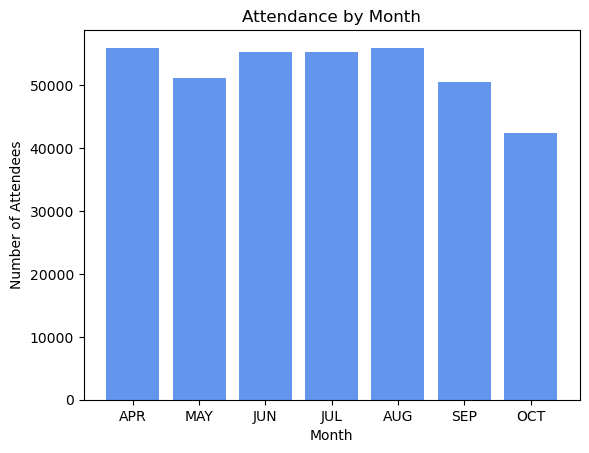

In [6]:
# Creates bar charts of attendance by month.
plt.bar(dodgers['month'], dodgers['attend'], color='cornflowerblue')
plt.title("Attendance by Month")
plt.xlabel("Month")
plt.ylabel("Number of Attendees")
plt.show()

In [7]:
# Shows the amount of month data points there are in the dataset.
dodgers['month'].value_counts()

month
MAY    18
AUG    15
APR    12
JUL    12
SEP    12
JUN     9
OCT     3
Name: count, dtype: int64

At first, the bar graph doesn't seem to tell us much. It looks like there are the least amount of attendees in October, but I wanted to check the amount of games in each month, as well. I'm glad I did because May has the highest amount of games, while still having fewer attendees than April, June, July, or August. October actually faired quite well while only having 3 games in the month. April and August seem to be the highest months for attendees.

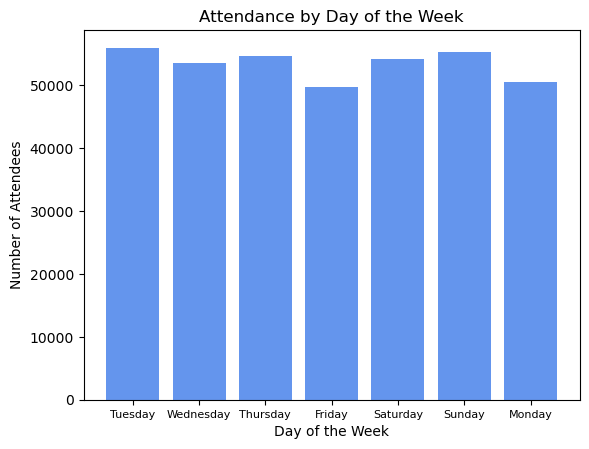

In [8]:
# Creates bar charts of attendance by day of the week.
plt.bar(dodgers['day_of_week'], dodgers['attend'], color='cornflowerblue')
plt.title("Attendance by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Attendees")
plt.xticks(fontsize = 8) # Makes the font size of the x-axis labels smaller since they were overlapping.
plt.show()

In [9]:
# Shows the amount of day of the week data points there are in the dataset.
dodgers['day_of_week'].value_counts()

day_of_week
Tuesday      13
Friday       13
Saturday     13
Sunday       13
Wednesday    12
Monday       12
Thursday      5
Name: count, dtype: int64

Again, by looking at the graph itself, it doesn't appear to show much of a different in the individual days of the week. I wanted to also show the value counts of the different days to see how they measured up. I was surprised by how well Thursdays did given they only had 5 games. The rest of the days all had about the same number of games (12-13). Perhaps there is something about Thursdays that makes the games more desirable to attend.

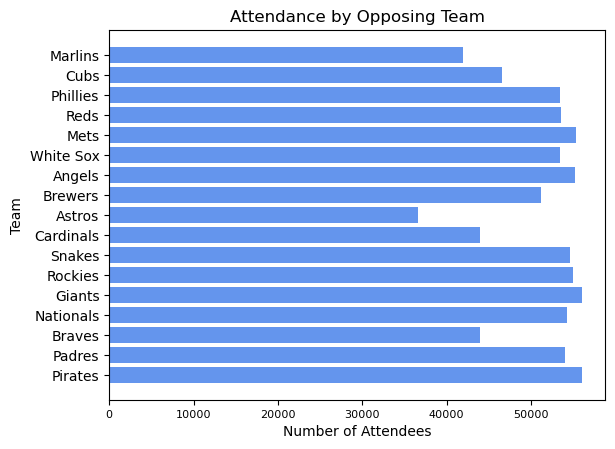

In [10]:
# Creates horizontal bar charts of attendance and the opposing team. (A vertical bar chart was too messy.)
plt.barh(dodgers['opponent'], dodgers['attend'], color='cornflowerblue')
plt.title("Attendance by Opposing Team")
plt.xlabel("Number of Attendees")
plt.ylabel("Team")
plt.xticks(fontsize = 8) # Makes the font size of the x-axis labels smaller.
plt.show()

In [11]:
# Shows the amount of opposing team data points there are in the dataset.
dodgers['opponent'].value_counts()

opponent
Giants       9
Rockies      9
Snakes       9
Padres       9
Cardinals    7
Mets         4
Brewers      4
Pirates      3
Cubs         3
Phillies     3
Reds         3
Astros       3
White Sox    3
Angels       3
Nationals    3
Braves       3
Marlins      3
Name: count, dtype: int64

It looks like either the Pirates or the Giants have the most attendees for the games. However, the Pirates also have a third of the amount of games compared to the Giants. I'm not sure how much power management would have over scheduling games, but if they could leverage the teams that more people are interested in watching the Dodgers play against, that could get more people to come to the games. On the other hand, it looks like the fewest amount of attendees attended the Astros games, so perhaps they can use other things to tempt people to show up to those games.

#### Exploratory Calculations

Originally, I had bar graphs plotted for each of the following calculations. However, they were all misleading once I saw the calculations done below. This is because there were so many more games in different categories compared to others (e.g., clear skies, nighttime games, no free ball caps, etc.) that it would skew the appearance of the bar charts. Instead, I decided to evaluate those columns based on the below calculations.

In [12]:
# Shows the amount of each different sky data point there are in the dataset.
dodgers['skies'].value_counts()

skies
Clear     62
Cloudy    19
Name: count, dtype: int64

In [13]:
# Calculates the average number of attendees by the sky (clear or cloudy).
dodgers.groupby('skies')['attend'].mean()

skies
Clear     41729.209677
Cloudy    38791.315789
Name: attend, dtype: float64

It doesn't look like there is much of a difference between the mean amount of attendees based on the skies (cloudy or clear) in the means. Based on the means, maybe more people are inclined to go to a game when it's sunny out, but it's hard to know if it's statistically significant just looking at the results.

In [14]:
# Shows the amount of different day/night game data points there are in the dataset.
dodgers['day_night'].value_counts()

day_night
Night    66
Day      15
Name: count, dtype: int64

In [15]:
# Calculates the average number of attendees by the time of day the game occurred.
dodgers.groupby('day_night')['attend'].mean()

day_night
Day      41793.266667
Night    40868.893939
Name: attend, dtype: float64

Again, there doesn't seem to be a big difference between day and night in terms of attendance. Even though there are much fewer games that occurred during the day, more people attended those. Perhaps management can leverage that and schedule more daytime games. Although, I am unsure just by looking at it if it is significant.

In [16]:
# Shows the amount of different ball cap data points there are in the dataset.
dodgers['cap'].value_counts()

cap
NO     79
YES     2
Name: count, dtype: int64

In [17]:
# Calculates the average number of attendees by whether ball caps were given out or not.
dodgers.groupby('cap')['attend'].mean()

cap
NO     41112.240506
YES    38189.500000
Name: attend, dtype: float64

It seems like, on average, fewer people attend games where ball caps are given out. However, there are only two data points where this occurred. It could be that fewer people attended for another reason. This will have to be investigated more later on.

In [18]:
# Shows the amount of different shirt data points there are in the dataset.
dodgers['shirt'].value_counts()

shirt
NO     78
YES     3
Name: count, dtype: int64

In [19]:
# Calculates the average number of attendees by whether shirts were given out or not.
dodgers.groupby('shirt')['attend'].mean()

shirt
NO     40824.551282
YES    46643.666667
Name: attend, dtype: float64

On average, there were more attendees for games that gave out free shirts than games that didn't, even though there were only three games in the dataset where that occurred. This might be a statistically significant finding (although I'll see later on), and it seems like people want to attend games where free things are given out.

In [20]:
# Shows the amount of different firework prevalence data points there are in the dataset.
dodgers['fireworks'].value_counts()

fireworks
NO     67
YES    14
Name: count, dtype: int64

In [21]:
# Calculates the average number of attendees by whether fireworks happened or not.
dodgers.groupby('fireworks')['attend'].mean()

fireworks
NO     41032.179104
YES    41077.857143
Name: attend, dtype: float64

It does not appear that people, on average, want to attend a game where there are fireworks compared to games that do not have them. Although, there are fewer games where fireworks occurred than games that they didn't. I'm not quite sure what to make of this finding, but it doesn't seem to be too exciting.

In [22]:
# Shows the amount of different bobblehead data points there are in the dataset.
dodgers['bobblehead'].value_counts()

bobblehead
NO     70
YES    11
Name: count, dtype: int64

In [23]:
# Calculates the average number of attendees by whether bobbleheads were given out or not.
dodgers.groupby('bobblehead')['attend'].mean()

bobblehead
NO     39137.928571
YES    53144.636364
Name: attend, dtype: float64

A lot more people attended games that gave out free bobbleheads! I am not sure yet if it is statistically significant, but considering there were only 11 games out of the 81 that gave out bobbleheads, it might be likely that this is a huge drawing factor to entice people to go to the games. Management would definitely need to know about this finding.

#### Correlation Analyses

In [24]:
# Now, I want to alter the variables of the non-numeric columns into numeric values to run correlation 
# analyses with the number of attendees because you cannot run '.corr()' with string values.

# Replaces the months with their numeric value.
dodgers['month'] = dodgers['month'].replace({"APR": 4, "MAY": 5, "JUN": 6, "JUL": 7, "AUG": 8, "SEP": 9,
                                            "OCT": 10})
# Replaces the days of the week with numeric values.
dodgers['day_of_week'] = dodgers['day_of_week'].replace({"Sunday": 1, "Monday": 2, "Tuesday": 3, 
                                                        "Wednesday": 4, "Thursday": 5, "Friday": 6, 
                                                        "Saturday": 7})

# Replaces the opponent names with numeric values.
dodgers['opponent'] = dodgers['opponent'].replace({"Giants": 1, "Rockies": 2, "Snakes": 3, "Padres": 4,
                                                  "Cardinals": 5, "Mets": 6, "Brewers": 7, "Pirates": 8,
                                                  "Cubs": 9, "Phillies": 10, "Reds": 11, "Astros": 12,
                                                  "White Sox": 13, "Angels": 14, "Nationals": 15,
                                                  "Braves": 16, "Marlins": 17})

# Replaces the 'skies' forecast with numeric values. (There was a trailing whitespace in 'Clear'.)
dodgers['skies'] = dodgers['skies'].replace({"Clear ": 1, "Cloudy": 2})

# Replaces the day/night time of day with numeric values.
dodgers['day_night'] = dodgers['day_night'].replace({"Day": 1, "Night": 2})

# The following columns all have the same values in them, so I can run a loop to change them. 
# Assigns the column names of the values I want to replace to 'replace_names'.
replace_names = ['cap', 'shirt', 'fireworks', 'bobblehead']

# Loops over those column names and replaces 'NO' with 0 and 'YES' with 1.
for name in replace_names:
    dodgers[name] = dodgers[name].replace({"NO": 0, "YES": 1})

In [25]:
# Prints the header to show it worked.
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,4,10,56000,3,8,67,1,1,0,0,0,0
1,4,11,29729,4,8,58,2,2,0,0,0,0
2,4,12,28328,5,8,57,2,2,0,0,0,0
3,4,13,31601,6,4,54,2,2,0,0,1,0
4,4,14,46549,7,4,57,2,2,0,0,0,0


In [26]:
# Creates a correlation matrix for the data frame to compare all variables with 'attend'.
dodgers.corr()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
month,1.000000,-0.317497,0.049306,-0.034183,-0.355156,0.806647,-0.132903,-0.001950,0.079739,-0.028081,-0.023376,-0.030223
day,-0.317497,1.000000,0.027093,0.160664,0.258826,-0.127612,-0.038396,-0.039828,-0.202274,-0.030182,0.099528,0.145363
attend,0.049306,0.027093,1.000000,0.045177,0.096267,0.098951,-0.150963,-0.043544,-0.055002,0.133269,0.002094,0.581895
day_of_week,-0.034183,0.160664,0.045177,1.000000,0.044460,-0.210856,0.173522,0.455972,-0.147091,-0.181300,0.423744,-0.003203
opponent,-0.355156,0.258826,0.096267,0.044460,1.000000,-0.403943,0.168992,-0.069666,0.103074,0.166932,0.083623,-0.080352
temp,0.806647,-0.127612,0.098951,-0.210856,-0.403943,1.000000,-0.316584,-0.272141,0.064521,0.004394,-0.189899,0.049573
skies,-0.132903,-0.038396,-0.150963,0.173522,0.168992,-0.316584,1.000000,0.188903,0.099671,-0.108566,-0.021880,-0.049349
day_night,-0.001950,-0.039828,-0.043544,0.455972,-0.069666,-0.272141,0.188903,1.000000,-0.128951,-0.074796,0.217922,0.188982
cap,0.079739,-0.202274,-0.055002,-0.147091,0.103074,0.064521,0.099671,-0.128951,1.000000,-0.031204,-0.072732,-0.063074
shirt,-0.028081,-0.030182,0.133269,-0.181300,0.166932,0.004394,-0.108566,-0.074796,-0.031204,1.000000,-0.089648,-0.077743


Since I am only trying to see what is correlated with attendance, I paid closest attention to the results in the 'attend' column/row (same in both). There's a weak correlation with attendance and skies at -0.15, meaning that as skies were cloudy, fewer people attended. However, if we go back to the calculations done above, there were only 19 games where the skies were cloudy, as opposed to 62 games where skies were clear. This finding has a weak Pearson correlation, and I wouldn't be surprised if the relationship is there because there were fewer cloudy games (it could be something else besides the clouds driving people to not go). There is also a weak correlation between free shirts and attendance at 0.13, meaning that if shirts were given out, more people attended. Even though it's a weak correlation, this is interesting since there were only 3 games that gave out shirts, as opposed to 78 games where they weren't. Perhaps this relationship would be stronger if there were more instances of it occurring.

Finally, there is a moderate correlation between attendance and bobbleheads at 0.58, meaning that if bobbleheads were given out, more people attended the games. While this isn't quite a strong correlation, it is still very interesting. There were only 11 games out of the 81 where bobbleheads were given out, so I'm sure this relationship would be stronger if the games were more balanced. It seems like people really like free things/collectables.

#### Linear Regression

In [27]:
# Now, I will evaluate a linear regression model on the data.
# Imports the necessary sklearn packages to run a linear regression and the numpy package to calculate root
# mean squared error.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [28]:
# Assigns all other columns besides 'attend' to 'features' and only 'attend' to 'target'.
features = dodgers.drop('attend', axis=1)
target = dodgers['attend']

# Uses 'train_test_split' on the dataset with a test size of 25%.
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, 
                                                                            random_state=42)
# Assigns the LinearRegression() function to 'regression'.
regression = LinearRegression()

In [29]:
# Fits the regression model to the training data.
regression.fit(features_train, target_train)

# Calculates the predictions on the test features.
predictions = regression.predict(features_test)

In [30]:
# Calculates and prints the R-squared value.
regression.score(features_test, target_test)

0.18369859667274768

In [31]:
# Calculates the mean squared error of the model.
mse = mean_squared_error(target_test, predictions)

# Calculates and prints the root mean squared error of the model (I find it easier than MSE to interpret).
np.sqrt(mse)

8443.069317453448

In [32]:
# Prints the model coefficients of the different features.
regression.coef_

array([  673.72108356,   -77.28389663,   493.90916649,   411.34880157,
          69.85798453, -3267.64850469, -3188.84479556, -1628.82708117,
        5114.22185101,  3860.43464844, 16744.024233  ])

In [33]:
# Prints the model intercept value.
regression.intercept_

34313.85232618003

#### Interpretation of Model Results
The model's R-squared value was 0.18, meaning that 18% of the variance in the model is explained by the features in the model. There may be unnecessary features in the model causing this value to be somewhat low. The root mean squared error (RMSE) of the model was 8,443.07, meaning the model's predictions on amount of attendees deviated from the true amount by about 8,443 people on average. The model's intercept was 34,313.85, meaning that if all the features were set to 0, the model expects the number of attendees to be about 34,314. The model coefficients show the importance of each feature to the model. Generally, the higher the number, the stronger the contribution to the model's predictions. We can see that the last feature and the third to last feature had the highest impact on the predictions. These features were bobbleheads and shirts, respectively. So, for every one-unit increase of bobbleheads and shirts (them being given out), the number of attendees are expected to increase by ~16,744 and ~5,114 people respectively.

This seems to fit the results of the exploratory analyses earlier on. Bobbleheads really seem to draw people to the games, probably because they're so collectible. I don't know anyone who doesn't love free shirts, so it's also not surprising that the prevalence of free shirts contributes to the model's predictions. These results influence my below recommendations to the Dodgers' management team.

#### Recommendation

I would recommend that the Dodgers' management team should consider giving out more free bobbleheads and free shirts, especially bobbleheads, if they were to only choose one. They are likely a collectors item, and they could entice people to want to come to more games. On average, the prevalence of free bobbleheads brings about 16,744 more people to the games, which means there are that many more people there who could spend money on other merchandise and/or food. While shirts don't bring out as many people (about 5,114 per game where they're given out), that's still a lot more people who could be spending money at the stadium. 

Overall, I think the findings of bobbleheads and shirts having an impact on the amount of attendees is pretty sound. While the correlation coefficient between number of attendees and free shirts was a weak one, I think that could be due to the statistical power of the number of games where free shirts were given out. There were much fewer instances of them, so I think the relationship could become stronger if it happened more often. The correlation between the number of attendees and prevalence of free bobbleheads was a moderate one, but I also think it's not considered strong due to the fact that there were much fewer instances of bobbleheads being given out.

If the Dodgers' management team considers giving out more free merchandise (particularly bobbleheads and shirts), they could increase the amount of attendees to their games.

#### References
Bobbitt, Z. (2021, November 22). _How to perform bivariate analysis in Python (with examples)._ Statology. https://www.statology.org/bivariate-analysis-in-python/

Gupta, A. (2023, August 2). _Python | Linear regression using sklearn._ GeeksforGeeks. https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/

Kumar, A. (2023, November 27). _A quick guide to bivariate analysis in Python._ Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/02/a-quick-guide-to-bivariate-analysis-in-python/

JMP. (n.d.). _Interpreting regression output._ https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/interpreting-regression-results.html

Thomas, S. (2023, April 11). _Understanding the Pearson correlation coefficient._ Outlier. https://articles.outlier.org/pearson-correlation-coefficient